# Week 06: Practice: Decision Tree and Random Forest

Exercise: classify airline customer satisfaction data.

Data source: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Request:
- Perform data preprocessing steps, build models, and evaluate training results.
- For the model building and evaluation step, think of ways to reduce coding for each model. The idea is that only the input model is different, the training, prediction, and evaluation part results are the same.
- Suggestion: write it into a function/class for reuse or simply use a for loop to iterate through each model.
- Models to build: Learned classification models: LogisticRegression, KNN, Naive Bayes, RandomForest, DecisionTree.
- Note: If memory overflows, you can reduce training or test data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load 2 datasets for train and test
train = pd.read_csv("Airline_Passenger_Satisfaction/train.csv")
test = pd.read_csv("Airline_Passenger_Satisfaction/test.csv")

In [3]:
train.shape

(103904, 25)

In [4]:
test.shape

(25976, 25)

In [5]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
print(train.isnull().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [8]:
print(test.isnull().sum())

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [9]:
# ordinal encoding for the target variable satisfaction with 1 being satisfied, and 0 being neutral or dissatisfied
train['satisfaction'] = train['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
test['satisfaction'] = test['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

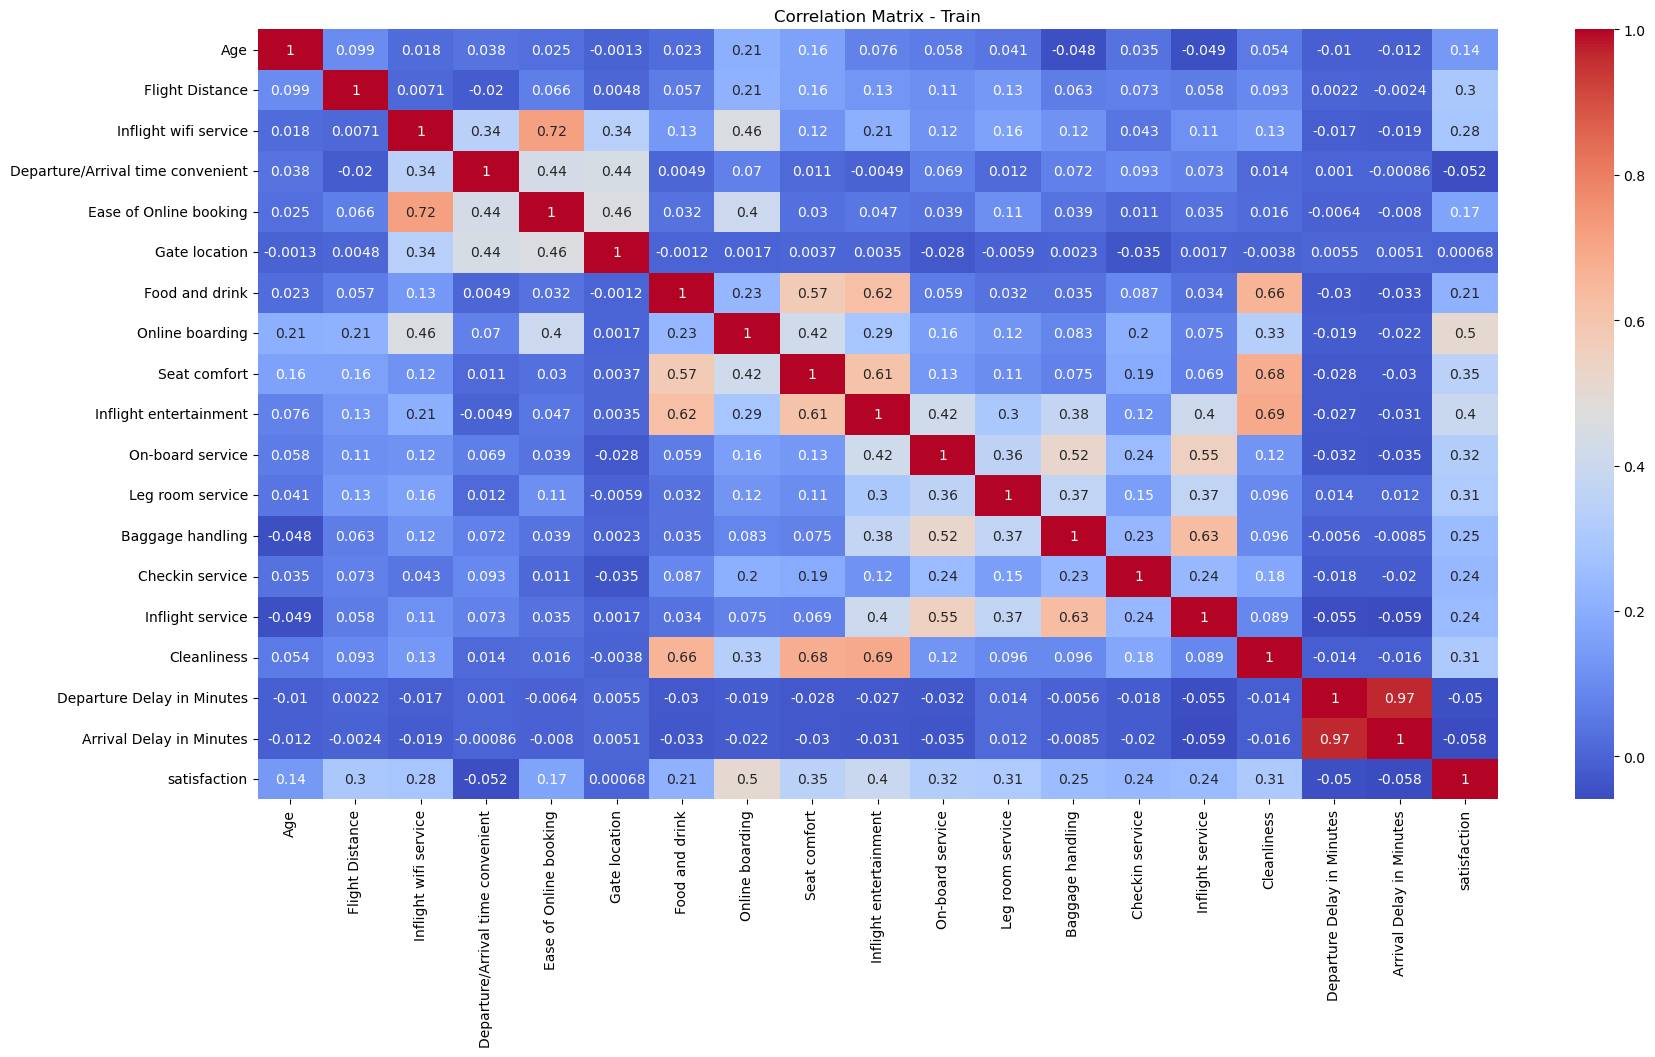

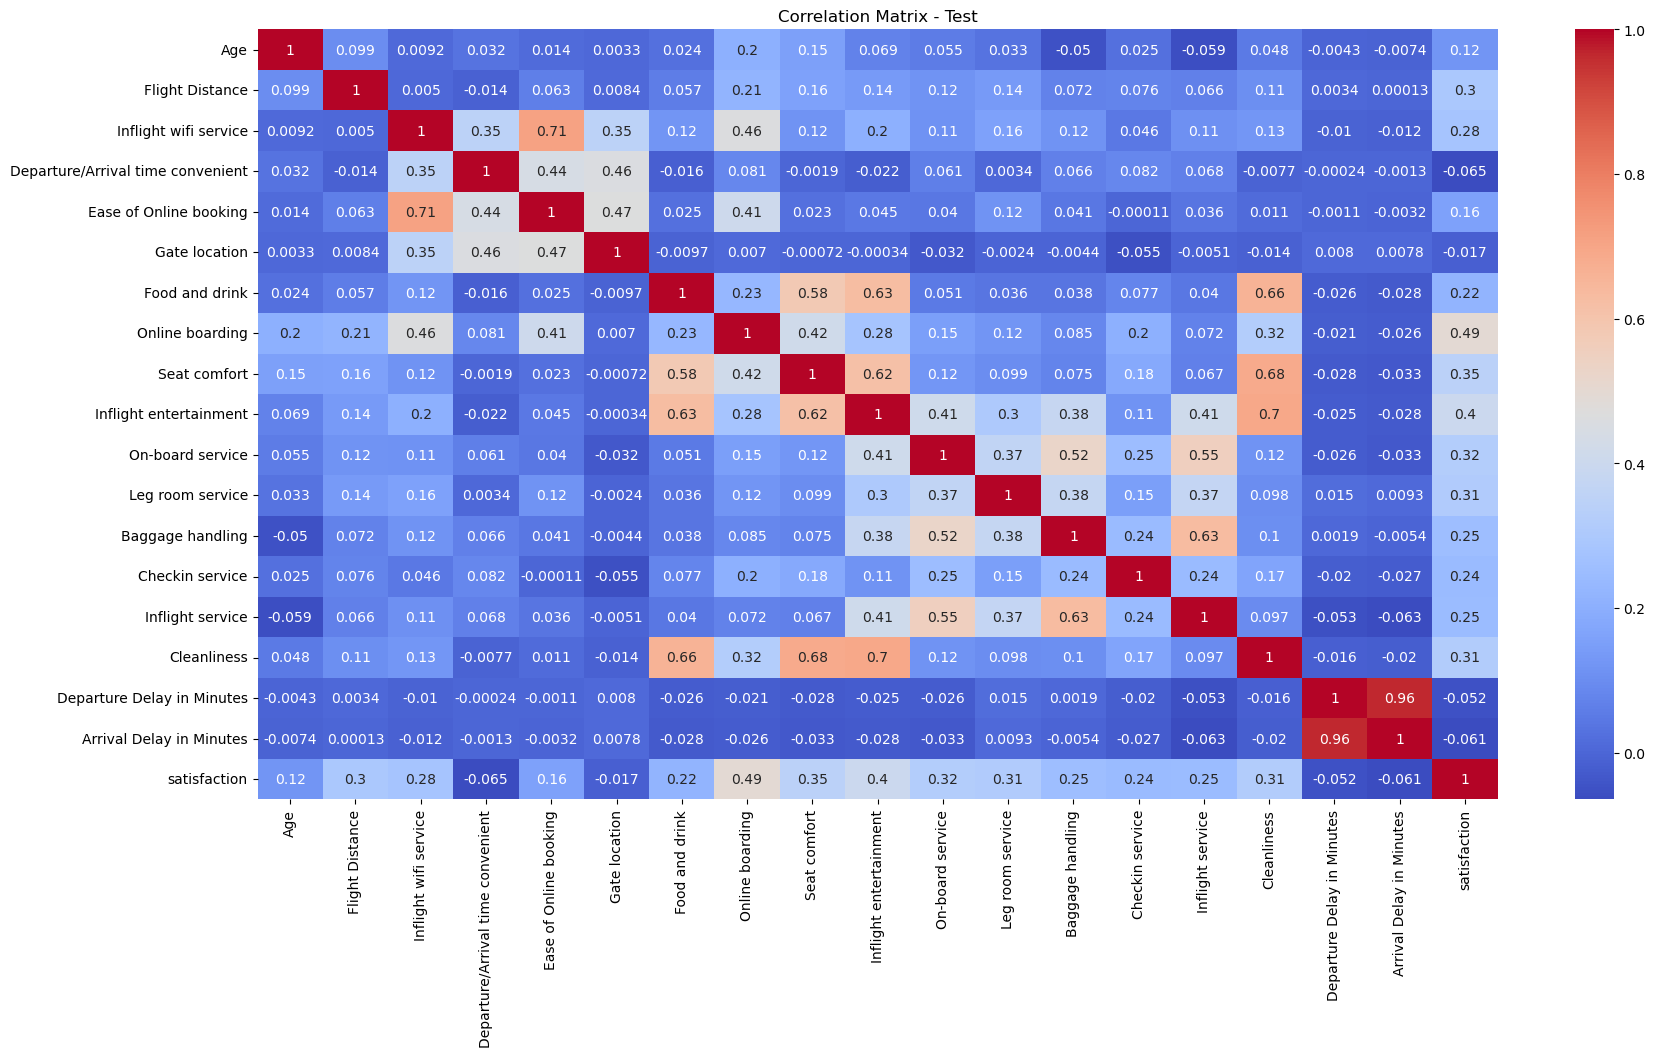

In [10]:
# Show the correlation matrix of the numerical variables and plot it as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical variables and exclude 'id' and 'Unnamed: 0'
num_vars_train = train.select_dtypes(include=['int64', 'float64']).drop(columns=['id', 'Unnamed: 0'])
num_vars_test = test.select_dtypes(include=['int64', 'float64']).drop(columns=['id', 'Unnamed: 0'])


# Compute the correlation matrix
corr_matrix_train = num_vars_train.corr()
corr_matrix_test = num_vars_test.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Train')
plt.show()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix_test, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Test')
plt.show()


In [11]:
# Check to see if missing values is less than 5% of the data
def check_missing_values(data):
    missing_values = data.isnull().sum()
    total_cells = np.product(data.shape)
    total_missing = missing_values.sum()
    percent_missing = (total_missing / total_cells) * 100
    return percent_missing

print(check_missing_values(train))
print(check_missing_values(test))

0.011934093008931322
0.012781028641823221


- The missing values is less than 5% of the data, and the column 'Arrival Delay in Minutes' shows a low correlation with the target variable in both train and test datasets which means that it is non-linear. Therefore, we can apply imputation algorithm to fill in the missing values.
- The reason I don't want to delete rows with missing values in the column 'Arrival Delay in Minutes' is that it may delete valid data and reduce information in the dataset.
- From the correlation matrices, we can see that the column 'Arrival Delay in Minutes' has a very strong correlation with the column 'Departure Delay in Minutes': 0.97 and 0.96 for the train and test datasets respectively. It is easily to understand that late arrivals always come from late departures.
- The imputation method I apply here is MICE (Multiple Imputation by Chained Equations). This is one of the most commonly used imputation methods in machine learning because of its ability to handle missing values and non-linear relationships.

In [12]:
# Drop unnecessary columns
train = train.drop(columns=["Unnamed: 0", "id"])
test = test.drop(columns=["Unnamed: 0", "id"])

In [13]:
# Convert categorical variables to numerical
train = pd.get_dummies(train, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])
test = pd.get_dummies(test, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])

In [14]:
# Fill missing values for train and test data using MICE imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Store column names
train_columns = train.columns
test_columns = test.columns

# Initialize MICE imputer
mice_imputer = IterativeImputer()

# Perform MICE imputation
train_imputed = mice_imputer.fit_transform(train)
test_imputed = mice_imputer.transform(test)

# Convert the imputed data back to DataFrames
train = pd.DataFrame(train_imputed, columns=train_columns)
test = pd.DataFrame(test_imputed, columns=test_columns)

In [15]:
# Split data into features and target
def split_data(data):
    X = data.drop(columns=['satisfaction'])
    y = data['satisfaction']
    return X, y

X_train, y_train = split_data(train)
X_test, y_test = split_data(test)

In [16]:
# Standardize data with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
def train_model(model, X_train, y_train, params=None):
    if params:
        grid_search = GridSearchCV(model, params, cv=5)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
    return model

# Predict
def predict(model, X_test):
    return model.predict(X_test)

# Evaluate model
def evaluate(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    return {"accuracy": acc, "report": report, "confusion_matrix": matrix}

In [18]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models with different parameters
models = {
    "Logistic Regression": (LogisticRegression(), {"C": [0.01, 0.1, 1, 10, 100],
                                                   "multi_class": ["auto", "ovr", "multinomial"],
                                                   "max_iter": [100, 200, 300],
                                                   "class_weight": [None, "balanced"]}),
    "K-Nearest Neighbors": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7],
                                                     "weights": ["uniform", "distance"],
                                                     "p": [1, 2, 3],
                                                     "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                                                     "leaf_size": [10, 20, 30]}),
    "Naive Bayes": (GaussianNB(), {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
                                   "priors": [None, [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]}),
    "Decision Tree": (DecisionTreeClassifier(), {"criterion": ["gini", "entropy", "log_loss"],
                                                 "max_depth": [None, 5, 10, 20],
                                                 "min_samples_split": [2],
                                                 "min_samples_leaf": [1],
                                                 "min_impurity_decrease": [0, 0.1, 0.2],
                                                 "max_features": [None, "sqrt", "log2"],
                                                 "max_leaf_nodes": [None, 10, 20, 30],
                                                 "class_weight": [None, "balanced"]}),
    "Random Forest": (RandomForestClassifier(), {"n_estimators": [100, 200, 300],
                                                 "criterion": ["gini", "entropy", "log_loss"],
                                                 "max_depth": [None, 5, 10, 20],
                                                 "min_samples_split": [2],
                                                 "min_samples_leaf": [1],
                                                 "max_features": [None, "sqrt", "log2"],
                                                 "bootstrap": [True],
                                                 "class_weight": [None, "balanced_subsample"],
                                                 "max_samples": [None, 0.5, 0.8]}),
}

Training Logistic Regression...
Best Parameters:
{'C': 0.01, 'class_weight': None, 'max_iter': 100, 'multi_class': 'auto'}
Logistic Regression Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     14573
         1.0       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



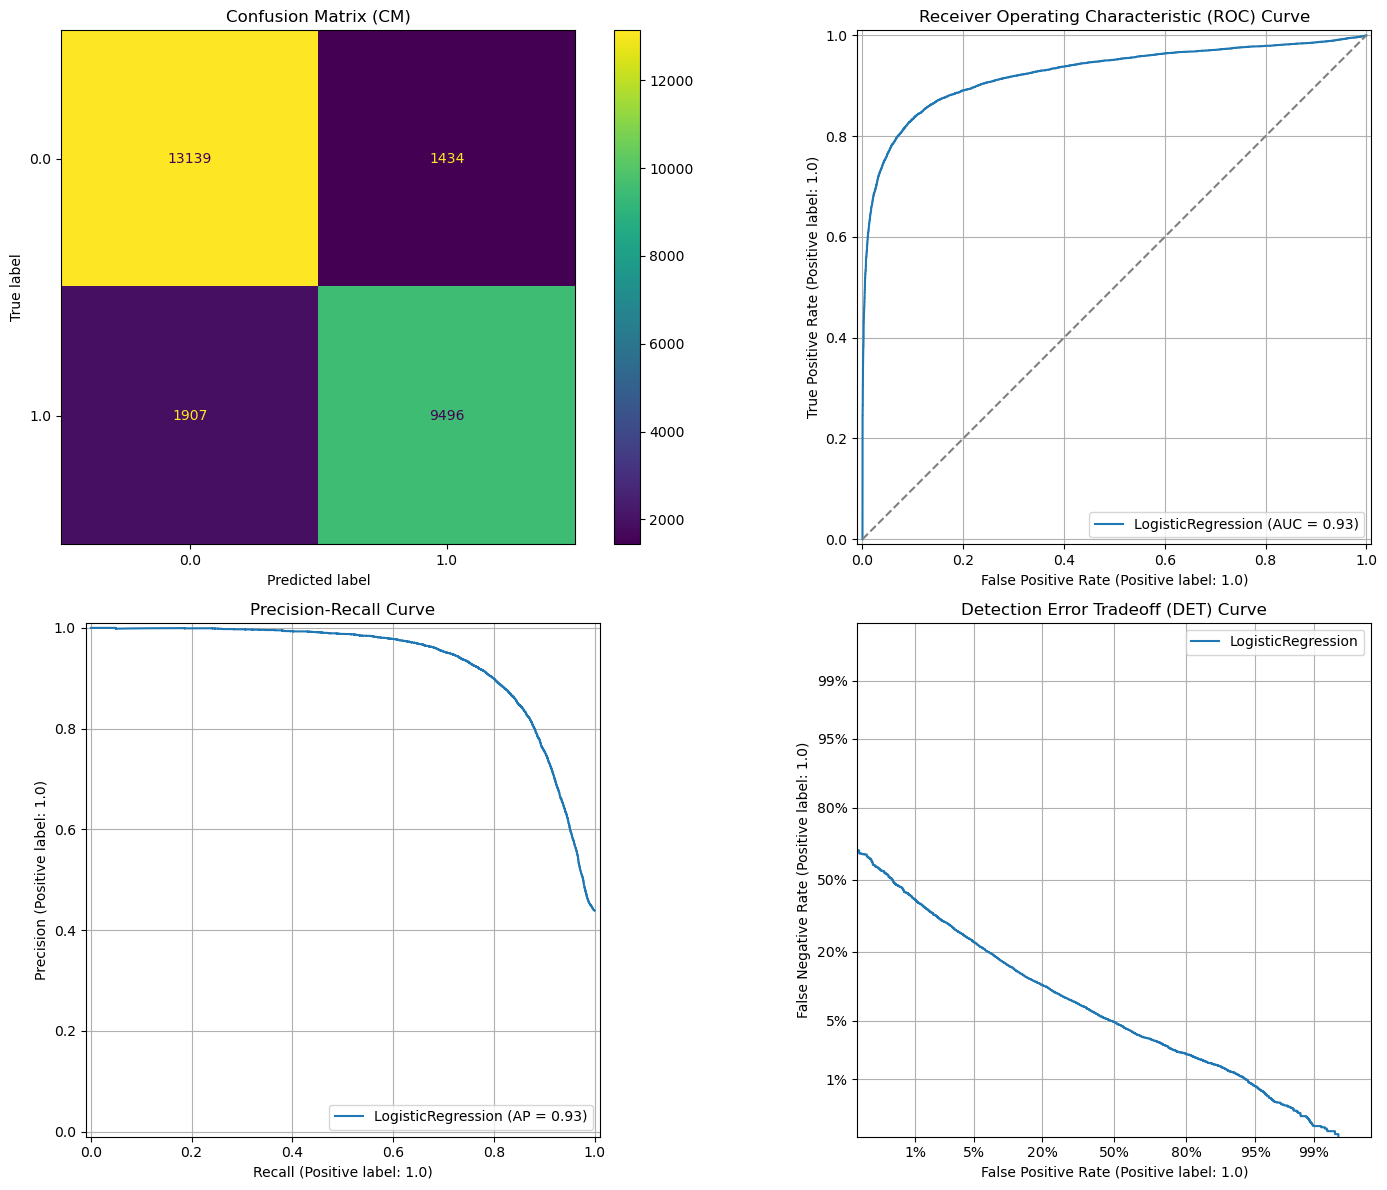

Training K-Nearest Neighbors...
Best Parameters:
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
K-Nearest Neighbors Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     14573
         1.0       0.95      0.90      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.93      0.94     25976
weighted avg       0.94      0.94      0.94     25976



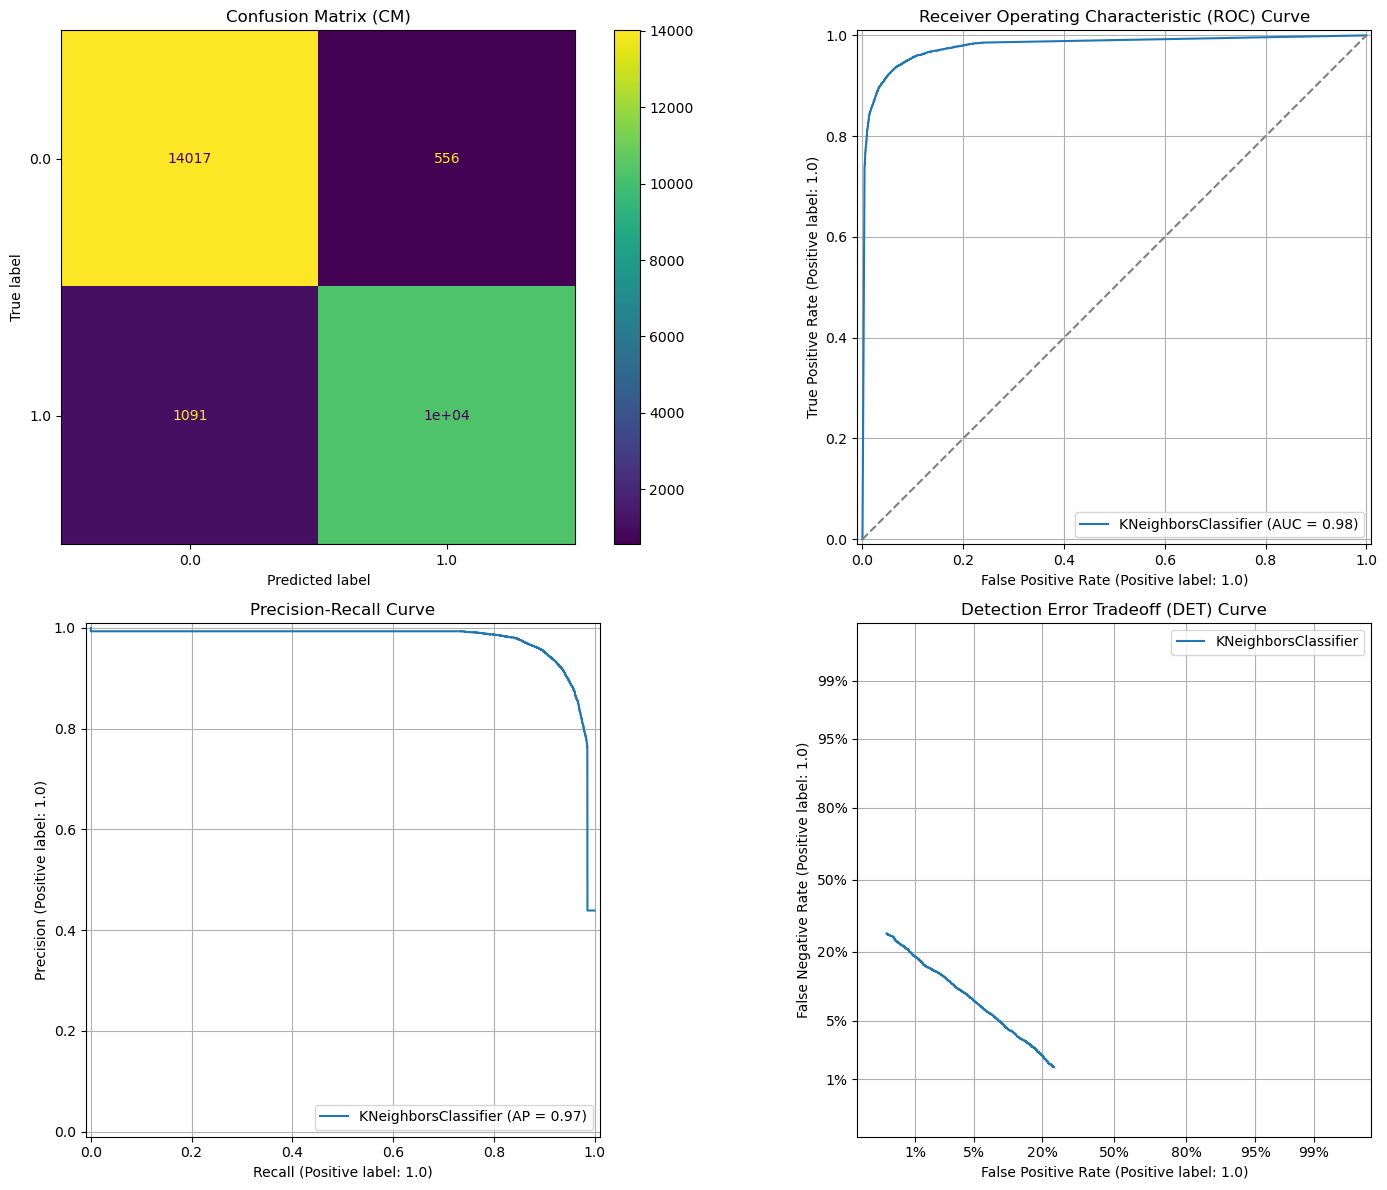

Training Naive Bayes...
Best Parameters:
{'priors': [0.9, 0.1], 'var_smoothing': 1e-09}
Naive Bayes Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87     14573
         1.0       0.87      0.77      0.82     11403

    accuracy                           0.85     25976
   macro avg       0.85      0.84      0.84     25976
weighted avg       0.85      0.85      0.85     25976



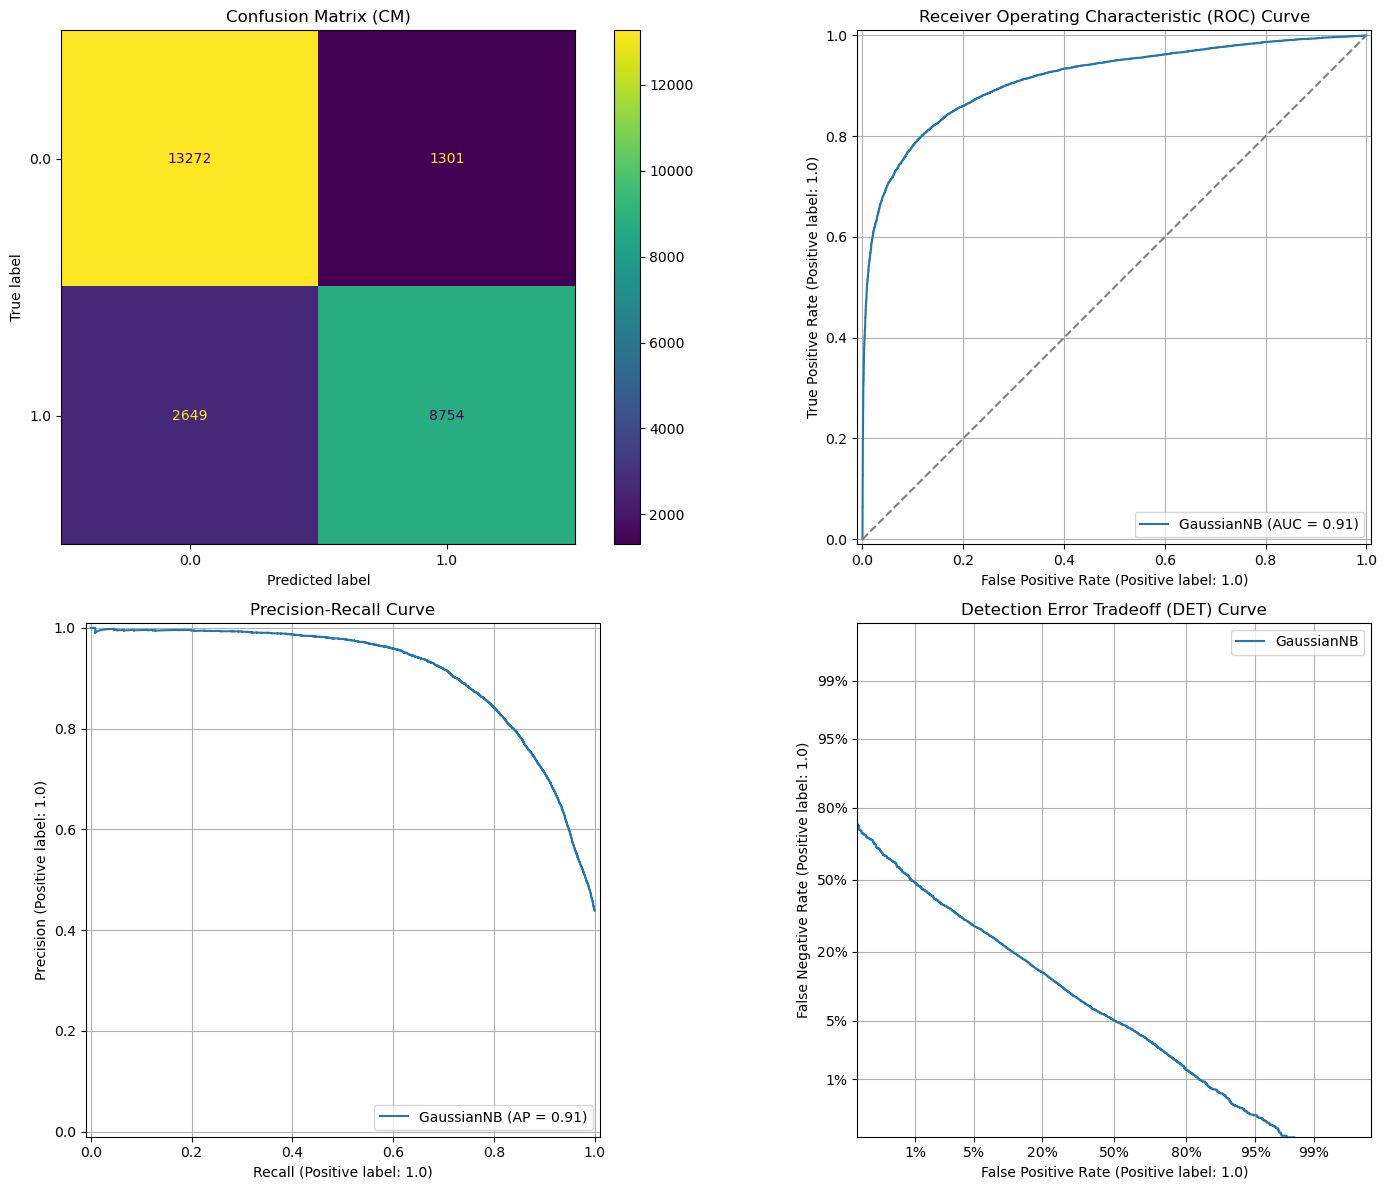

Training Decision Tree...
Best Parameters:
{'class_weight': None, 'criterion': 'log_loss', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     14573
         1.0       0.95      0.94      0.95     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



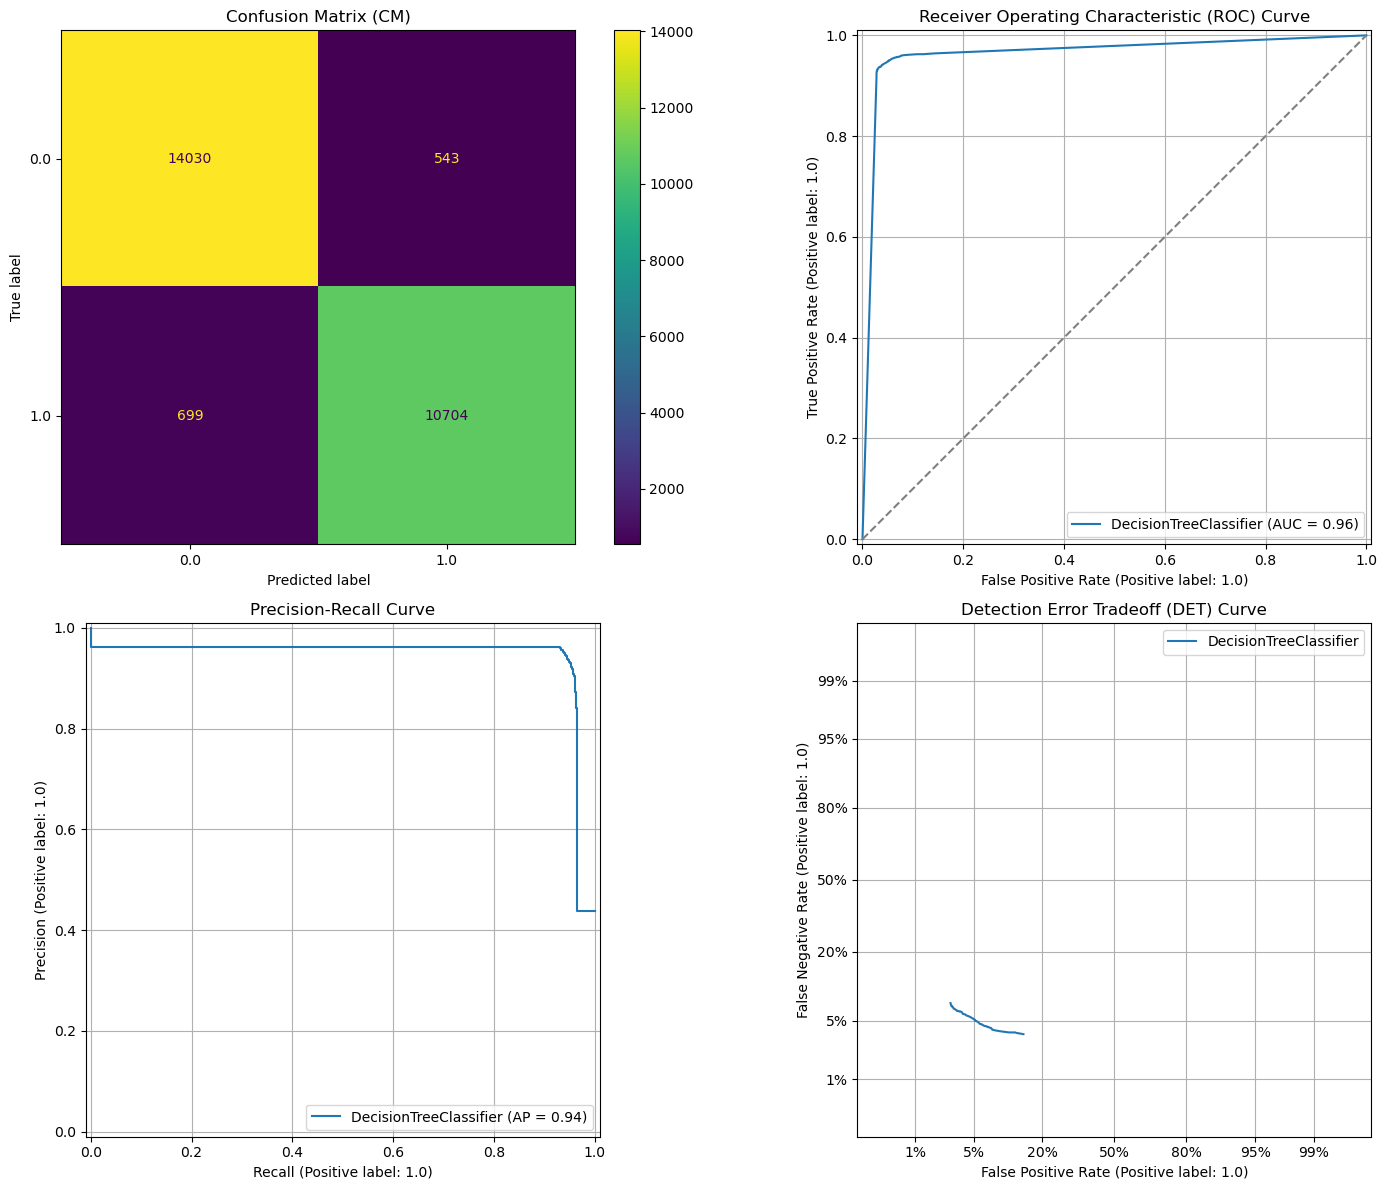

Training Random Forest...
Best Parameters:
{'bootstrap': True, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     14573
         1.0       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



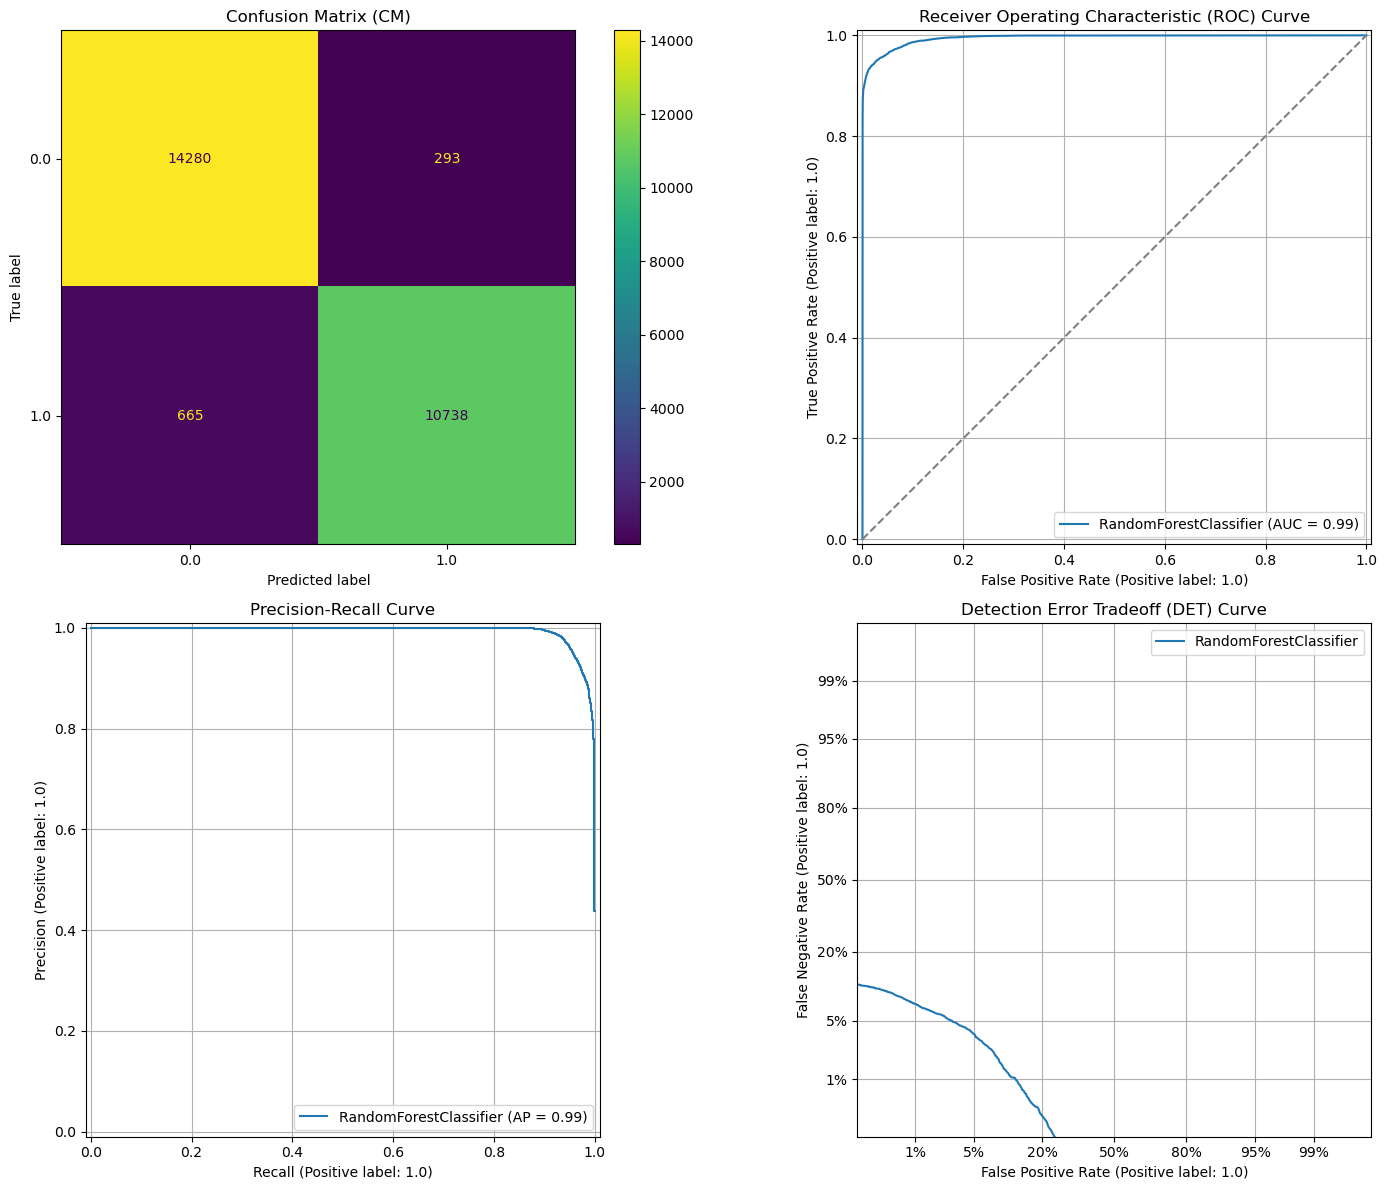

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, PrecisionRecallDisplay, DetCurveDisplay
# Dictionary to store evaluation results
results = {}

# Train, predict, and evaluate each model
for name, (model, params) in models.items():
    print(f"Training {name}...")
    if params:  # Check if grid search is needed
        # Initialize StratifiedKFold
        kf = StratifiedKFold(n_splits=5)
        # Perform grid search
        grid_search = GridSearchCV(model, params, cv=kf, 
                                   n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)  # Ensure to use scaled data if scaling is applied
        trained_model = grid_search.best_estimator_
        print("Best Parameters:")
        print(grid_search.best_params_)  # Print best parameters found by GridSearchCV
    else:
        trained_model = model.fit(X_train_scaled, y_train)  # Ensure to use scaled data if scaling is applied
    y_pred = predict(trained_model, X_test_scaled)  # Ensure to use scaled data if scaling is applied
    results[name] = evaluate(y_test, y_pred)
    print(f"{name} Accuracy: {results[name]['accuracy']:.2f}")
    print("Classification Report:")
    print(results[name]['report'])

    # Create subplots to plot 4 plots in a 2x2 grid
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    # Plot the confusion matrix using ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(trained_model, X_test_scaled, y_test, ax=axes[0, 0])
    axes[0, 0].set_title("Confusion Matrix (CM)")
    axes[0, 0].grid(False)
    axes[0, 0].set_axisbelow(True)
    axes[0, 0].set_aspect("equal")
    axes[0, 0].set_frame_on(True)
    axes[0, 0].set_box_aspect(1)
    # Plot the ROC curve using RocCurveDisplay
    RocCurveDisplay.from_estimator(trained_model, X_test_scaled, y_test, ax=axes[0, 1])
    axes[0, 1].plot([0, 1], [0, 1], linestyle="--", color="gray")
    axes[0, 1].set_title("Receiver Operating Characteristic (ROC) Curve")
    axes[0, 1].legend(loc="lower right")
    axes[0, 1].grid(True)
    axes[0, 1].set_axisbelow(True)
    axes[0, 1].set_aspect("equal")
    axes[0, 1].set_frame_on(True)
    axes[0, 1].set_box_aspect(1)
    # Plot the prediction error using PrecisionRecallDisplay
    PrecisionRecallDisplay.from_estimator(trained_model, X_test_scaled, y_test, ax=axes[1, 0])
    axes[1, 0].set_title("Precision-Recall Curve")
    axes[1, 0].legend(loc="lower right")
    axes[1, 0].grid(True)
    axes[1, 0].set_axisbelow(True)
    axes[1, 0].set_aspect("equal")
    axes[1, 0].set_frame_on(True)
    axes[1, 0].set_box_aspect(1)
    # Plot the precision-recall curve using DetCurveDisplay
    DetCurveDisplay.from_estimator(trained_model, X_test_scaled, y_test, ax=axes[1, 1])
    axes[1, 1].set_title("Detection Error Tradeoff (DET) Curve")
    axes[1, 1].legend(loc="upper right")
    axes[1, 1].grid(True)
    axes[1, 1].set_axisbelow(True)
    axes[1, 1].set_aspect("equal")
    axes[1, 1].set_frame_on(True)
    axes[1, 1].set_box_aspect(1)

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.tight_layout()
    plt.show()

- After running GridSearchCV for all classifiers, we can see that the best parameters are found for all classifiers including its evaluation metrics and plots. 
- Random Forest Classifier has the best accuracy of 0.96, with the best parameters found by GridSearchCV:
    - 'bootstrap': True
    - 'class_weight': None
    - 'criterion': 'log_loss'
    - 'max_depth': None
    - 'max_features': None
    - 'max_samples': 0.5
    - 'min_samples_leaf': 1
    - 'min_samples_split': 2
    - 'n_estimators': 300
- From the classification report, we can see that Random Forest Classifier has a precision of 0.97, a recall of 0.94, and an F1 score of 0.96 for the positive class (satisfied).
- From the evaluation plots, the ROC curve (AUC = 0.99), the Precision-Recall curve, and the DET curve are all good at distinguishing between the positive and negative classes.
- Therefore, we can choose Random Forest Classifier as the best model.